<center><span style="color:gray";><h1><b>Commute and Intersections Metrics</b></h1></span></center>


I created multiple indicators which I used to rank the neighborhoods by using:
<ul style="padding-left: 40px;">
    <li>The population per neighborhood</li>
    <br>
    <li>The amount of intersections per neighborhood</li>
    <br>
    <li>The street density and miles of road per neighborhood</li>
    <br>
    <li>The % of people who commute alone by car per neighborhood</li>
    <br>
    <li>The % of people who Carpool/Vanpool per neighborhood</li>
    <br>
    <li>The % of people who commute via motorcycle per neighborhood</li>
    <br>
    <li>The % of people who commute via public transportation per neighborhood</li>
    <br>
    <li>The % of people who commute via taxi per neighborhood</li>
    <br>
    <li>The % of people who commute via bicycle per neighborhood</li>
    <br>
    <li>The % of people who commute by walking per neighborhood</li>
</ul>

The section below generates 2 graphs. The first graph depicts street density vs percent of Motor and Non-Motor commutes.

The second graph depicts intersections per neighborhood vs percent of Motor and Non-Motor commutes.

Non-Motor commutes means the percent of people who bike to work plus those who walk to work.

Motor commute means the cummaltive percentages of people who commute to work via:
<ul style="padding-left: 40px;">
    <li>car (alone) per neighborhood</li>
    <li>Carpool/Vanpool per neighborhood</li>
    <li>Motorcycle per neighborhood</li>
    <li>Public transportation per neighborhood</li>
    <li>Taxi per neighborhood</li>
</ul>

In [69]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Start by loading the data and cleaning it up
useful_data = pd.read_csv('Useful_Data.csv')
useful_data.dropna(subset=[
    'Density (st. mi/area mi^2)', 'Intersection Count', 'Commute to Work: Bicycle (2010)', 'Commute to Work: Walk (2010)',
    'Commute to Work: Motorcycle (2010)', 'Commute to Work: Carpool/Vanpool (2010)', 
    'Commute to Work: Public Transportation (2010)', 'Drive Alone (2010)'
], inplace=True)

In [70]:
# We're interested in the sum of people commuting by non-motor and motor methods
non_motor_commuters = useful_data['Commute to Work: Bicycle (2010)'] + useful_data['Commute to Work: Walk (2010)']
motor_commuters = useful_data[['Commute to Work: Taxi (2010)', 'Commute to Work: Motorcycle (2010)', 
                               'Commute to Work: Carpool/Vanpool (2010)', 'Commute to Work: Public Transportation (2010)', 
                               'Drive Alone (2010)']].sum(axis=1)

In [71]:
# The first plot looks at commuters vs. density
density = useful_data['Density (st. mi/area mi^2)']
non_motor_fit = stats.linregress(density, non_motor_commuters)
motor_fit = stats.linregress(density, motor_commuters)

# The second plot looks at commuters vs. intersection count
intersections = useful_data['Intersection Count']
non_motor_fit_intersections = stats.linregress(intersections, non_motor_commuters)
motor_fit_intersections = stats.linregress(intersections, motor_commuters)


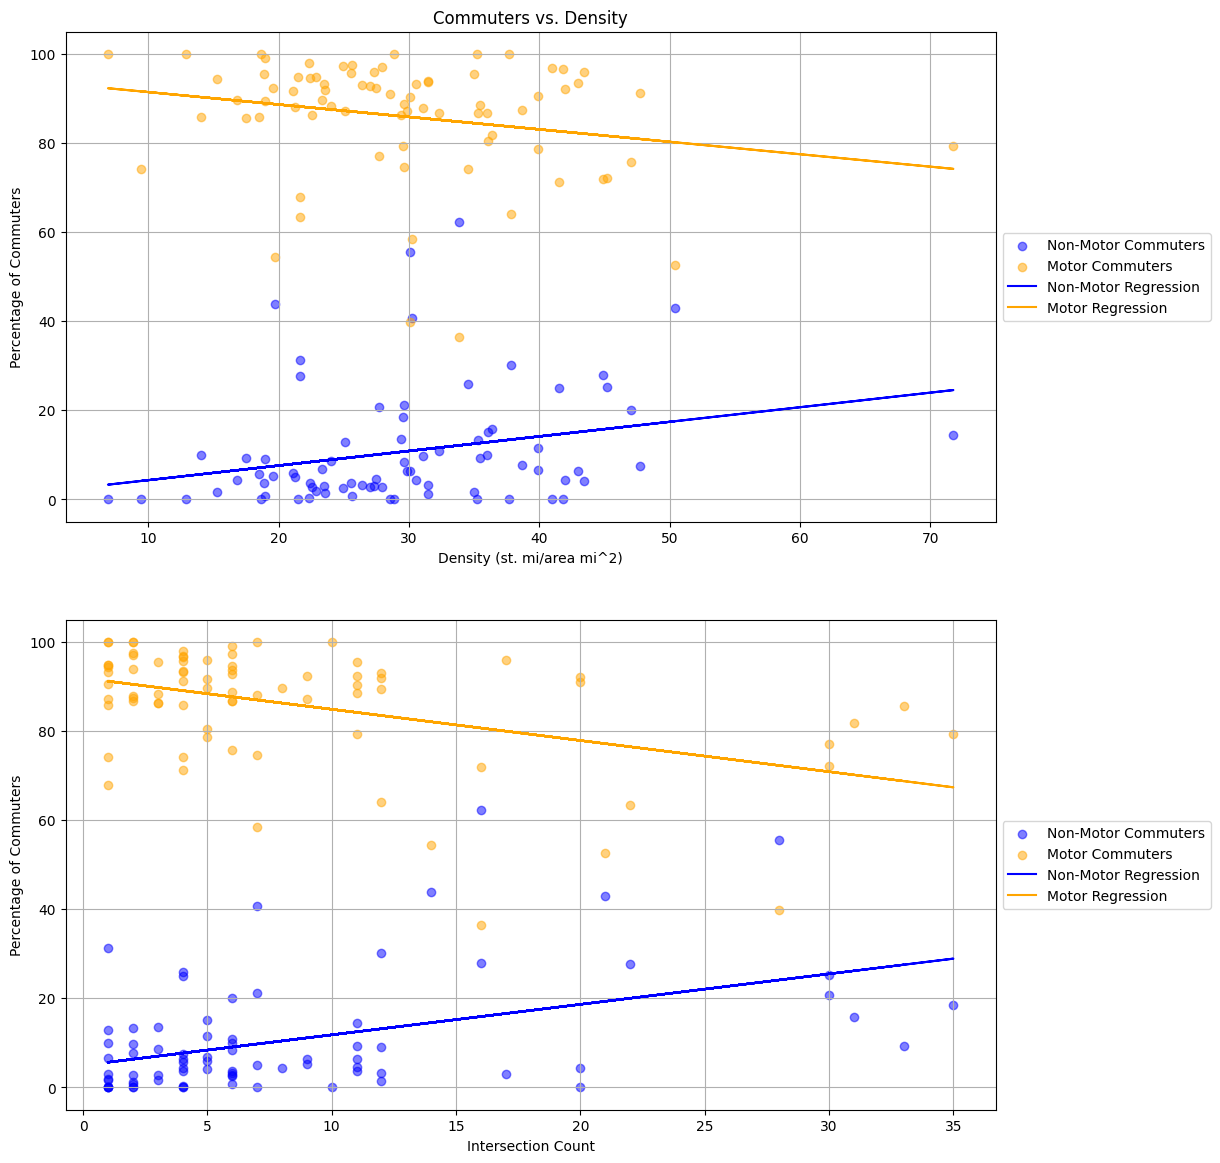

In [72]:
# Time to visualize the data in two plots
fig, ax = plt.subplots(2, 1, figsize=(12, 14))

# Scatter plot and regression lines for the first plot
ax[0].scatter(density, 100*non_motor_commuters, alpha=0.5, color='blue', label='Non-Motor Commuters')
ax[0].scatter(density, 100*motor_commuters, alpha=0.5, color='orange', label='Motor Commuters')
ax[0].plot(density, 100*(non_motor_fit.intercept + non_motor_fit.slope*density), 'blue', label='Non-Motor Regression')
ax[0].plot(density, 100*(motor_fit.intercept + motor_fit.slope*density), 'orange', label='Motor Regression')

# Customize the first plot with titles and labels
ax[0].set_title('Commuters vs. Density')
ax[0].set_xlabel('Density (st. mi/area mi^2)')
ax[0].set_ylabel('Percentage of Commuters')

# Scatter plot and regression lines for the second plot
ax[1].scatter(intersections, 100*non_motor_commuters, alpha=0.5, color='blue', label='Non-Motor Commuters')
ax[1].scatter(intersections, 100*motor_commuters, alpha=0.5, color='orange', label='Motor Commuters')
ax[1].plot(intersections, 100*(non_motor_fit_intersections.intercept + non_motor_fit_intersections.slope*intersections), 'blue', label='Non-Motor Regression')
ax[1].plot(intersections, 100*(motor_fit_intersections.intercept + motor_fit_intersections.slope*intersections), 'orange', label='Motor Regression')

# Customize the second plot with titles and labels
ax[1].set_xlabel('Intersection Count')
ax[1].set_ylabel('Percentage of Commuters')

# Add legends outside of the plot area
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Enable the grid
ax[0].grid(True)
ax[1].grid(True)


The graph below depicts population density vs percentage of commuters.

The population density was calculated by using the formula Density=[Population (2010)]/([Total Street Miles]/[Density (st. mi/area mi^2)])

When the units from the formula cancel out, we are left with people per miles².

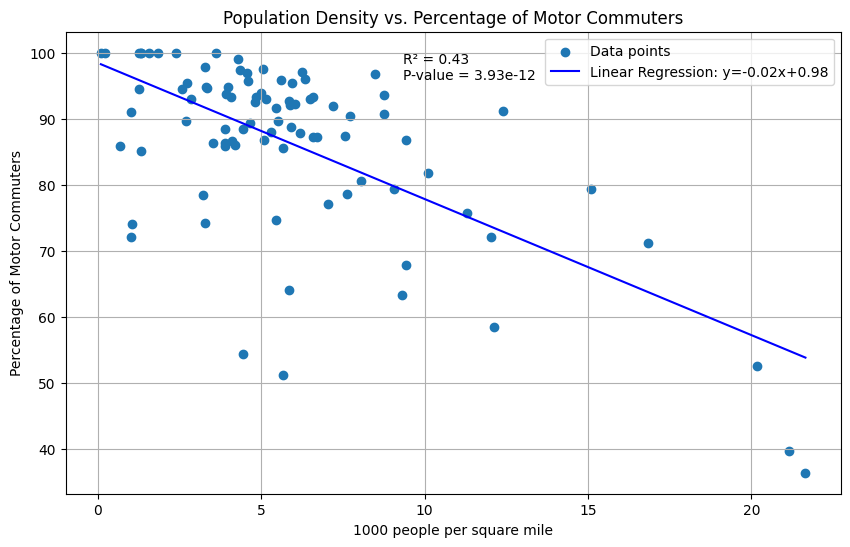

In [73]:
# Load the dataset from 'Useful_Data.csv'
useful_data = pd.read_csv('Useful_Data.csv')

# Removing rows with NaN values for accurate statistical analysis
useful_data.dropna(subset=[
    'Population (2010)', 'Total Street Miles', 'Density (st. mi/area mi^2)', 'Drive Alone (2010)', 'Commute to Work: Carpool/Vanpool (2010)', 
    'Commute to Work: Motorcycle (2010)', 'Commute to Work: Public Transportation (2010)', 'Commute to Work: Taxi (2010)'], inplace=True)

# Calculating x as [Population (2010)]/([Total Street Miles]/[Density (st. mi/area mi^2)])
x = (useful_data['Population (2010)']/1000) / (useful_data['Total Street Miles'] / useful_data['Density (st. mi/area mi^2)'])

# Calculating y as the sum of various commute methods
y = (useful_data['Drive Alone (2010)'] + useful_data['Commute to Work: Carpool/Vanpool (2010)'] + useful_data['Commute to Work: Motorcycle (2010)'] +
     useful_data['Commute to Work: Public Transportation (2010)'] + useful_data['Commute to Work: Taxi (2010)'])


slope, intercept, rvalue, p_value, std_err = stats.linregress(x, y)

#Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, 100*y, label='Data points')
plt.title('Population Density vs. Percentage of Motor Commuters')
plt.xlabel('1000 people per square mile')
plt.ylabel('Percentage of Motor Commuters')

# Adding a linear trend line
x_range = np.linspace(min(x), max(x), 100)
plt.plot(x_range, 100*(intercept + slope*x_range), 'blue', label=f'Linear Regression: y={slope:.2f}x+{intercept:.2f}')

# Annotating with R² and P value for the linear model
plt.annotate(f'R² = {rvalue**2:.2f}\nP-value = {p_value:.2e}', xy=(0.435, 0.9555), xycoords='axes fraction', fontsize=10, verticalalignment='top')

plt.legend()
plt.grid(True)
plt.show()


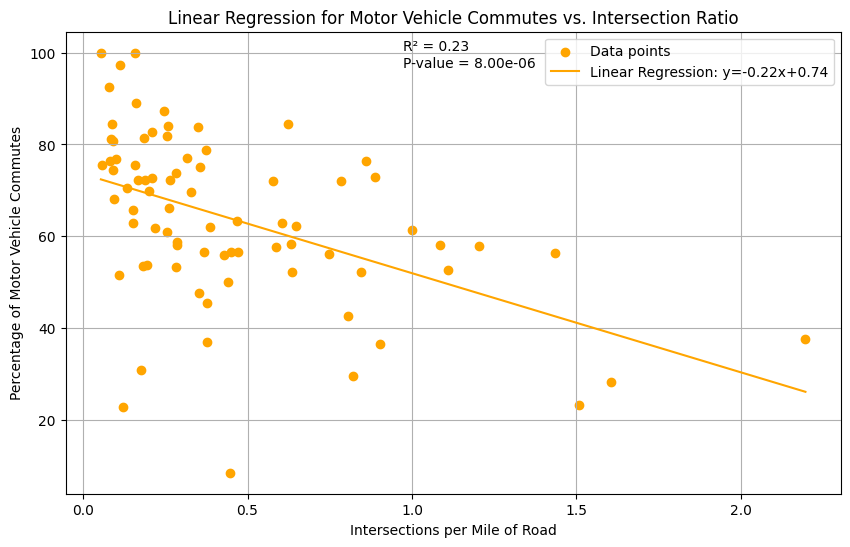

In [74]:

# Load the dataset from 'Useful_Data.csv'
useful_data = pd.read_csv('Useful_Data.csv')

# Removing rows with NaN values for accurate statistical analysis
useful_data.dropna(subset=[
    'Intersection Count', 'Miles of Major Roads', 'Total Street Miles',
    'Drive Alone (2010)', 'Commute to Work: Carpool/Vanpool (2010)',
    'Commute to Work: Motorcycle (2010)', 'Commute to Work: Taxi (2010)'
], inplace=True)


y = (useful_data['Commute to Work: Taxi (2010)'] + useful_data['Commute to Work: Motorcycle (2010)'] +
     useful_data['Commute to Work: Carpool/Vanpool (2010)'] + useful_data['Drive Alone (2010)'])

# Update x to be the ratio of 'Intersection Count' to the sum of 'Miles of Major Roads' and 'Total Street Miles'
x = useful_data['Intersection Count'] / (useful_data['Miles of Major Roads'] + useful_data['Total Street Miles'])

# Calculate the linear regression on the data
slope, intercept, rvalue, p_value, std_err = stats.linregress(x, y)

# Creating a scatter plot with the original data
plt.figure(figsize=(10, 6))
plt.scatter(x, 100*y, color='orange', label='Data points')  # Color added here as well for consistency
plt.title('Linear Regression for Motor Vehicle Commutes vs. Intersection Ratio')
plt.xlabel('Intersections per Mile of Road')
plt.ylabel('Percentage of Motor Vehicle Commutes')

# Adding a linear trend line
x_range = np.linspace(min(x), max(x), 100)
plt.plot(x_range, 100*(intercept + slope*x_range), 'orange', label=f'Linear Regression: y={slope:.2f}x+{intercept:.2f}')  # Color changed to green

# Annotating with R² and P value for the linear model
plt.annotate(f'R² = {rvalue**2:.2f}\nP-value = {p_value:.2e}',
             xy=(0.435, 0.9825), xycoords='axes fraction',
             fontsize=10, verticalalignment='top')

plt.legend()
plt.grid(True)
plt.show()

In [75]:
# Load the dataset
file_path = "Useful_Data.csv"
df = pd.read_csv(file_path)

# Rank neighborhoods based on each metric
# For Density, Drive Alone, Carpool/Vanpool, and Motorcycle (lower is better)
df
df['Intersection_Count'] = df['Intersection Count']
df['Intersection_Rank']=df['Intersection_Count'].rank(method='min', ascending=False)
df['Rank_Density'] = df['Density (st. mi/area mi^2)'].rank(method='min', ascending=False)
df['Rank_Drive_Alone'] = df['Drive Alone (2010)']
df['Carpool_Vanpool'] = df['Commute to Work: Carpool/Vanpool (2010)']
df['Motorcycle'] = df['Commute to Work: Motorcycle (2010)']
df['Rank_Car_Van'] = (df['Drive Alone (2010)']+df['Commute to Work: Carpool/Vanpool (2010)']+df['Motorcycle']).rank(method='min', ascending=True)
df['Intersection_Ratio_Rank']=(df['Intersection Count'] / (df['Miles of Major Roads'] + df['Total Street Miles'])).rank(method='min', ascending=False)
df['Population_density'] = (df['Population (2010)'] / (df['Total Street Miles'] / df['Density (st. mi/area mi^2)'])).rank(method='min', ascending=False)

# For Public Transportation, Bicycle, and Walk (lower is better)
df['Rank_Public_Transportation'] = df['Commute to Work: Public Transportation (2010)'].rank(method='min', ascending=True)
df['Rank_Bicycle'] = df['Commute to Work: Bicycle (2010)'].rank(method='min', ascending=False)

# Calculate the eighth ranking by summing up all ranks and name it 'total_rank'
df['total_rank'] = df[['Intersection_Rank', 'Intersection_Rank', 'Rank_Density', 'Rank_Car_Van', 'Intersection_Ratio_Rank','Rank_Public_Transportation', 'Rank_Bicycle', 'Population_density']].sum(axis=1)

# Exclude rows with NaN values
df_clean = df.dropna()

# Sort by 'total_rank'
df_sorted = df_clean.sort_values(by='total_rank')

# Rearrange columns
columns_ordered = ['Neighborhood', 'total_rank', 'Intersection_Rank', 'Rank_Density', 'Rank_Public_Transportation', 'Intersection_Ratio_Rank', 'Rank_Bicycle', 'Population_density']
df_final = df_sorted[columns_ordered]

# Add a column for sequence number
df_final.reset_index(drop=True, inplace=True)
df_final.index += 1

# Set display options to show all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.width', 1000)        # Set display width to prevent wrapping
pd.set_option('display.colheader_justify', 'center')  # Center the column headers

# Display the final rankings along with all individual rankings
display(df_final)


,Neighborhood,total_rank,Intersection_Rank,Rank_Density,Rank_Public_Transportation,Intersection_Ratio_Rank,Rank_Bicycle,Population_density
1,North Oakland,81.0,6.0,37.0,15.0,2.0,8.0,2.0
2,Bloomfield,103.0,4.0,6.0,48.0,12.0,2.0,8.0
3,Central Oakland,109.0,12.0,29.0,22.0,3.0,26.0,1.0
4,Bluff,121.0,8.0,2.0,55.0,13.0,26.0,3.0
5,Shadyside,157.0,1.0,42.0,63.0,6.0,18.0,5.0
6,East Liberty,157.0,3.0,19.0,59.0,5.0,26.0,10.0
7,Squirrel Hill North,160.0,7.0,69.0,12.0,18.0,14.0,13.0
8,South Side Flats,173.0,4.0,48.0,33.0,8.0,16.0,23.0
9,South Oakland,178.0,15.0,17.0,25.0,28.0,26.0,36.0
10,East Allegheny,182.0,19.0,1.0,54.0,26.0,21.0,14.0
